# Facebook_Posts_Analysis

In [1]:
import requests
import time
import pickle
import random
import pandas as pd
import os, sys
import pprint
import pandas as pd
import string
from operator import itemgetter
import nltk
import matplotlib
pp = pprint.PrettyPrinter()

#goalcast?fields=posts{comments.limit(0).summary(true),likes.limit(0).summary(true),message.limit(0).summary(true),created_time.limit(0).summary(true)}

 # Token for access to FB

For Security reasons have masked the token

In [2]:
token = "EAACEdEose0cBAICmwQZAnMCyGE55aG3JdTYyhEH8ZADLZAcu7bZBfkYTfbNjbPXDkvnclIyg3FscoeUDYb4fZAaXQCAO74VorZBaZBNTOjMZBS1ANJjsnhJ0BYTPomB6B5RLu9L8QPTZBrTHS2f9kCU9xyPTkgyZBwAtWYen4WPZBx7ECsXzNCFV6MFJjfwcbgMweAZD"

# Function to Receive Raw Data

In [3]:
def req_facebook(req):
    req_v = requests.get("https://graph.facebook.com/v2.12/"+ req,{'access_token' : token})
    return req_v

Parsing and converting received the raw data

In [4]:
results = req_facebook(input("Enter The request::")).json()
#pp.pprint (results)
results=results['posts']
data =list()

i=0
while True:
    try:
        data.extend(results['data'])
        r= requests.get(results['paging']['next'])
        results = r.json()
        i +=1
        print (i)
        if i > 200:
            break
    except:
        print ("done")
        break


Enter The request::goalcast?fields=posts{comments.limit(0).summary(true),likes.limit(0).summary(true),message.limit(0).summary(true),created_time.limit(0).summary(true)}
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
done


Storing the Raw Data into pickle file

In [5]:
#loading data
pickle.dump(data,open("goalcast_final.pkl","wb"))

In [6]:
loaded_data = pickle.load(file = open("goalcast_final.pkl","rb"))

# Putting raw data into Pandas DataFrame

In [7]:
df_main = pd.io.json.json_normalize(data=loaded_data)
df_main.head()

,comments.data,comments.summary.can_comment,comments.summary.order,comments.summary.total_count,created_time,id,likes.data,likes.summary.can_like,likes.summary.has_liked,likes.summary.total_count,message
0,[],True,ranked,8,2018-03-20T03:00:00+0000,897393153671209_1783711528372696,[],True,False,585,Check the top 3 life lessons from the Dalai La...
1,[],True,ranked,7,2018-03-20T01:00:00+0000,897393153671209_1783937275016788,[],True,False,597,It triggered a whole virtuous cycle
2,[],True,ranked,13,2018-03-19T23:00:00+0000,897393153671209_1783938225016693,[],True,False,561,It is a happiness to wonder; it is a happiness...
3,[],True,ranked,100,2018-03-19T21:00:50+0000,897393153671209_1783949368348912,[],True,False,2531,From victim to victor: How John Assaraf turned...
4,[],True,ranked,48,2018-03-19T19:00:00+0000,897393153671209_1783731718370677,[],True,False,862,Both Bill Gates and Jeff Bezos like to do hous...


In [8]:
df_main.columns

Index(['comments.data', 'comments.summary.can_comment',
       'comments.summary.order', 'comments.summary.total_count',
       'created_time', 'id', 'likes.data', 'likes.summary.can_like',
       'likes.summary.has_liked', 'likes.summary.total_count', 'message'],
      dtype='object')

In [9]:
df_dropped_columns = df_main.drop(['comments.data','comments.summary.can_comment','comments.summary.order','likes.data', 'likes.summary.can_like', 'likes.summary.has_liked'],1)

In [10]:
df_dropped_columns.rename(columns={"comments.summary.total_count" :"com_Counts", "likes.summary.total_count":"like_Counts"}, inplace = True)

In [11]:
df_dropped_columns.head()

,com_Counts,created_time,id,like_Counts,message
0,8,2018-03-20T03:00:00+0000,897393153671209_1783711528372696,585,Check the top 3 life lessons from the Dalai La...
1,7,2018-03-20T01:00:00+0000,897393153671209_1783937275016788,597,It triggered a whole virtuous cycle
2,13,2018-03-19T23:00:00+0000,897393153671209_1783938225016693,561,It is a happiness to wonder; it is a happiness...
3,100,2018-03-19T21:00:50+0000,897393153671209_1783949368348912,2531,From victim to victor: How John Assaraf turned...
4,48,2018-03-19T19:00:00+0000,897393153671209_1783731718370677,862,Both Bill Gates and Jeff Bezos like to do hous...


# Most Commented Post

In [12]:
goalcast_df = df_dropped_columns

In [13]:
top_comments = goalcast_df.sort_values('com_Counts',ascending= False)
top_10 =top_comments.head(10)

In [14]:
top_10_ids = top_10['id']
for i,x in top_10_ids.iteritems():
    print ("https://www.facebook.com/"+x)

https://www.facebook.com/897393153671209_1371881936222326
https://www.facebook.com/897393153671209_1585909778152873
https://www.facebook.com/897393153671209_1644386875638496
https://www.facebook.com/897393153671209_1533350906742094
https://www.facebook.com/897393153671209_1601308876612963
https://www.facebook.com/897393153671209_1281367035273817
https://www.facebook.com/897393153671209_1743269045750278
https://www.facebook.com/897393153671209_1530408390369679
https://www.facebook.com/897393153671209_1572385972838587
https://www.facebook.com/897393153671209_1654559554621228


# Most liked Post

In [15]:
top_likes = goalcast_df.sort_values('like_Counts',ascending= False)
top_10_likes =top_likes.head(10)
#print (top_10_likes)
top_10_likes_ids = top_10_likes['id']
for i,x in top_10_likes_ids.iteritems():
    print ("https://www.facebook.com/"+x)

https://www.facebook.com/897393153671209_1601308876612963
https://www.facebook.com/897393153671209_1585909778152873
https://www.facebook.com/897393153671209_1533350906742094
https://www.facebook.com/897393153671209_1530408390369679
https://www.facebook.com/897393153671209_1510811738996011
https://www.facebook.com/897393153671209_1371881936222326
https://www.facebook.com/897393153671209_1292424704168050
https://www.facebook.com/897393153671209_1654559554621228
https://www.facebook.com/897393153671209_1548459668564551
https://www.facebook.com/897393153671209_1572385972838587



# Fuction Removal of Digits, strings and stop words

In [16]:
import string
import re
p=string.punctuation+"“"+"’"+"‘"+"”"+"😢"
d=string.digits

def punc_digit(input_text):
    table_p = str.maketrans(p, len(p) * " ")
    table_d = str.maketrans(d, len(d) * " ")
    after_punc = input_text.translate(table_p)
    final = after_punc.translate(table_d)
    return final


stopwords = ["a","about","above","after","again","against",
                 "all","am","an","and","any","are","aren't",
                 "as",	"at",	"be",	"because",	"been",	
                 "before",	"being",	"below",	"between",
                 "both",	"but",	"by",	"can't",	"cannot",
                 "could",	"couldn't",	"did",	"didn't",	"do",
                 "does",	"doesn't",	"doing",	"don't","down",
                 "during",	"each",	"few",	"for",	"from",	"further",
                 "had",	"hadn't",	"has",	"hasn't",	"have",
                 "haven't",	"having",	"he",	"he'd",	"he'll",	"he's",
                 "her",	"here",	"here's",	"hers",	"herself",	"him",	"himself",
                 "his",	"how",	"how's",	"i",	"i'd",	"i'll",	"i'm",
                 "i've",	"if",	"in",	"into",	"is",	"isn't",	"it",
                 "it's",	"its",	"itself",	"let's",	"me",	"more",
                 "most",	"mustn't",	"my",	"myself",	"no",	"nor",
                 "not",	"of",	"off",	"on",	"once",	"only",	"or",
                 "other",	"ought",	"our",	"ours",	"ourselves",
                 "out",	"over",	"own",	"same",	"shan't",	"she",	"she'd"
                 ,	"she'll",	"she's",	"should",	"shouldn't",	"so",
                 "some",	"such",	"than",	"that",	"that's",	"the",
                 "their",	"theirs",	"them",	"themselves",	"then",
                 "there",	"there's",	"these",	"they",	"they'd",
                 "they'll",	"they're",	"they've",	"this",	"those",
                 "through",	"to",	"too",	"under",	"until",	"up",
                 "very",	"was",	"wasn't",	"we",	"we'd",	"we'll",
                 "we're",	"we've",	"were",	"weren't",	"what",	"what's",
                 "when",	"when's",	"where",	"where's",	"which",
                 "while",	"who",	"who's",	"whom",	"why",	"why's",
                 "with",	"won't",	"would",	"wouldn't",	"you",
                 "you'd",	"you'll",	"you're",	"you've",	"your",	"yours",	"yourself",	"yourselves","s","t","nan","one"
 ]


# Counts of Words

In [17]:
def word_counts(df):
    words = dict()
    lines = list()
    for line in goalcast_df['message']:
        line = str (line)
        line = re.sub(r'http\S+', '', line)
        pd = punc_digit(line)
        lines.append(pd)
    
    for l in lines:
        for word in l.split():
            word = word.strip()
            word = word.lower()
            if word not in stopwords:
                if len(word) >= 3:
                    if word in words:
                        words[word] +=1
                    else:
                        words[word] = 1

    return words


In [18]:
words2 = word_counts(goalcast_df)
#words

In [19]:
#df = pd.DataFrame([(i, j) for i, j in words.items()], columns=["Words", "Counts"])
df_words= pd.DataFrame(list(words2.items()), columns = ['Words','Counts'])
df_words.head()

,Words,Counts
0,check,7
1,top,20
2,life,176
3,lessons,10
4,dalai,4


In [20]:
sorted_words =df_words.sort_values('Counts', ascending=False)
sorted_words

,Words,Counts
568,free,210
2,life,176
51,will,129
228,success,121
91,get,119
74,can,115
90,business,97
118,help,97
227,path,87
263,make,80


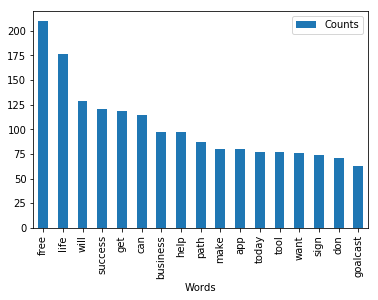

In [21]:
%matplotlib inline
sorted_words[sorted_words['Counts'] > 60].plot(x='Words', kind = 'Bar')

# Stemming

In [22]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
words1 = list()

for k in df_words['Words']:
    words1.append(k)
    

words2 =list()

for word in words1:
    words2.append(ps.stem(word))
    


# Count of Positve and Negative words

The list of positive and negative words are from following paper
"   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
       Proceedings of the ACM SIGKDD International Conference on Knowledge 
       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
       Washington, USA, "

In [23]:
infile = open("C:/Users/Darshit/Desktop/Sem 4/jg_ch20_text_mining/0_notebooks/positive_words.txt", "r")
text = infile.read()

In [24]:
pos_words = []
for pw in text.split("\n"):
    pos_words.append(pw)

In [25]:
infile1 = open("C:/Users/Darshit/Desktop/Sem 4/jg_ch20_text_mining/0_notebooks/negative_words.txt", "r")
text1 = infile1.read()

In [26]:
neg_words = []
for nw in text1.split("\n"):
    neg_words.append(pw)

In [27]:
dict_p = dict()
dict_n = dict()
for w in words2:
    if w in pos_words:
        #print(w)
        if w in dict_p:
            dict_p[w] +=1
        else:
            dict_p[w] = 1
    elif w in neg_words:
        print (w)
        if w in dict_n:
            dict_n[w] +=1
        else:
            dict_p[w] = 1
            
            

In [28]:
df_pos = pd.DataFrame(list(dict_p.items()), columns = ['Pos_Word','Count'])

In [29]:
sorted_pos_words =df_pos.sort_values('Count', ascending=False)
top_10_pos_words =sorted_pos_words.head(10)

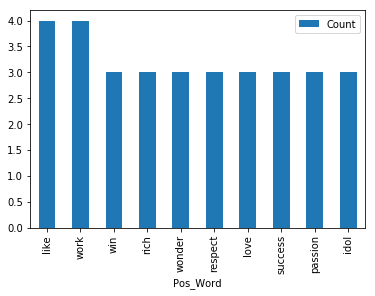

In [30]:
%matplotlib inline
top_10_pos_words.plot(x='Pos_Word', kind = 'Bar')

# Sentimental Analysis of the Words

In [31]:
from textblob import TextBlob

message = dict()

for line in goalcast_df['message']:
    line = str(line)

    tb_pos = TextBlob(line)
    message[line] = [tb_pos.subjectivity,tb_pos.polarity]
    #    print (tb_pos)
    #    print(tb_pos.sentiment)
    #    print(tb_pos.polarity)
    #    print(tb_pos.subjectivity)


In [32]:
#df_message = pd.DataFrame(list(message.items()))\
df_message = pd.DataFrame([(i,j[0],j[1]) for i, j in message.items() ], columns=["Line", "Subjectivity", "Polarity"])
df_message.dropna(axis=0)
df_message.head()

,Line,Subjectivity,Polarity
0,Check the top 3 life lessons from the Dalai La...,0.750000,0.3000
1,It triggered a whole virtuous cycle,0.400000,0.2000
2,It is a happiness to wonder; it is a happiness...,0.200000,0.7000
3,From victim to victor: How John Assaraf turned...,0.203571,-0.0375
4,Both Bill Gates and Jeff Bezos like to do hous...,0.000000,0.0000


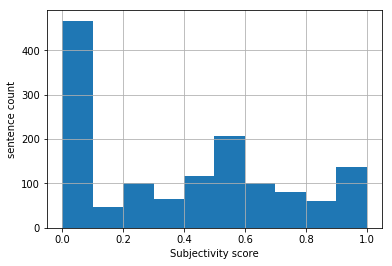

In [33]:
import matplotlib.pyplot as plt

plt.hist(df_message['Subjectivity'], bins=10) #, normed=1, alpha=0.75)
plt.xlabel('Subjectivity score')
plt.ylabel('sentence count')
plt.grid(True)
#plt.savefig('subjectivity.pdf')
plt.show()

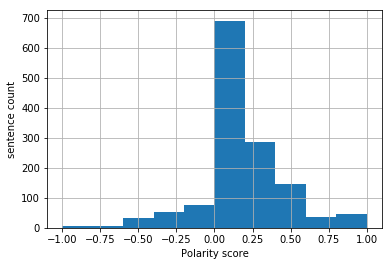

In [34]:
import matplotlib.pyplot as plt

plt.hist(df_message['Polarity'], bins=10) #, normed=1, alpha=0.75)
plt.xlabel('Polarity score')
plt.ylabel('sentence count')
plt.grid(True)
#plt.savefig('subjectivity.pdf')
plt.show()

# Word_Cloud

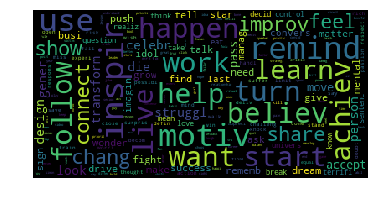

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#stopwords = nltk.corpus.stopwords.words('english')

wordcloud2 = WordCloud().generate(" ".join(words2))
#plt.imshow(wordcloud2)
#plt.axis('off')
wordcloud2 = WordCloud(max_font_size=40).generate(" ".join(words2))
plt.figure()
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()
